In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_path = "dataset/TRAIN"
test_path = "dataset/TEST"

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [15]:
x_data = []
y_data = []
for catagory in glob(train_path+'/*'):
    for file in tqdm(glob(catagory+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(catagory.split('/')[-1])
    data = pd.DataFrame({'image':x_data, 'label':y_data})

100%|█████████████████████████████████████████████████████████████████████████████| 9999/9999 [00:30<00:00, 329.49it/s]


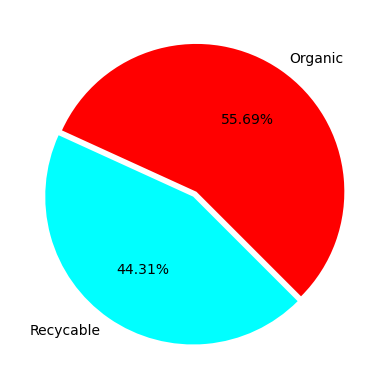

In [39]:
colors = ['red', 'cyan']
plt.pie(data.label.value_counts(), labels=["Organic","Recycable"], autopct="%0.2f%%", colors=colors, startangle = -45, explode = [0.02, 0.02])
plt.show()